In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
%matplotlib inline

In [2]:
#Data_set=pd.read_csv("Spam.xls")

with open("spambase/spambase.names") as spam:
 text = spam.read()
labels = re.findall(r'\n(\w*_?\W?):', text)
#labels.append('Class')
df = pd.read_csv("spambase/spambase.data", header=None, names=labels +['spam'])

In [3]:
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [5]:
df.duplicated() #finding duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
4596    False
4597    False
4598    False
4599    False
4600    False
Length: 4601, dtype: bool

In [6]:
df.drop_duplicates(inplace=True) #dropping duplicates
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4210 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4210 non-null   float64
 1   word_freq_address           4210 non-null   float64
 2   word_freq_all               4210 non-null   float64
 3   word_freq_3d                4210 non-null   float64
 4   word_freq_our               4210 non-null   float64
 5   word_freq_over              4210 non-null   float64
 6   word_freq_remove            4210 non-null   float64
 7   word_freq_internet          4210 non-null   float64
 8   word_freq_order             4210 non-null   float64
 9   word_freq_mail              4210 non-null   float64
 10  word_freq_receive           4210 non-null   float64
 11  word_freq_will              4210 non-null   float64
 12  word_freq_people            4210 non-null   float64
 13  word_freq_report            4210 

In [7]:
df.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

# PCA

In [18]:
#Removing the target column

target_dropped_df=df.drop(labels=['spam'], axis=1)
target_dropped_df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


In [20]:
#Statistical information before standard scaling

target_dropped_df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,...,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000
mean,0.104366,0.112656,0.291473,0.063078,0.325321,0.096656,0.117475,0.108000,0.091860,0.248420,...,0.034746,0.040403,0.144048,0.017376,0.281136,0.076057,0.045798,5.383896,52.139905,291.181948
std,0.300005,0.454260,0.515719,1.352487,0.687805,0.276030,0.397284,0.410282,0.282144,0.656638,...,0.298521,0.252533,0.274256,0.105731,0.843321,0.239708,0.435925,33.147358,199.582168,618.654838
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.627500,7.000000,40.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.073000,0.000000,0.016000,0.000000,0.000000,2.297000,15.000000,101.500000
75%,0.000000,0.000000,0.440000,0.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.190000,...,0.000000,0.000000,0.194000,0.000000,0.331000,0.053000,0.000000,3.706750,44.000000,273.750000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


In [24]:
#Performing Standard Scaling

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(target_dropped_df)
standardized_df=pd.DataFrame(data=scaled_data, columns= target_dropped_df.columns)

In [25]:
#Dataset after performing Standard Scaling

standardized_df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,-0.347922,1.161025,0.675889,-0.046644,-0.007737,-0.350205,-0.295731,-0.263265,-0.325617,-0.378366,...,-0.116407,-0.160010,-0.525294,-0.164364,0.589246,-0.317325,-0.105071,-0.049117,0.044398,-0.021310
1,0.352150,0.368433,0.404391,-0.046644,-0.269470,0.664297,0.232922,-0.092630,-0.325617,1.053337,...,-0.116407,-0.160010,-0.043936,-0.164364,0.107759,0.433676,0.005053,-0.008143,0.244841,1.191142
2,-0.147901,-0.248027,0.811639,-0.046644,1.315470,0.338207,0.182574,0.029252,1.943000,0.002406,...,-0.116407,-0.120407,-0.003822,-0.164364,-0.006090,0.450365,-0.082129,0.133876,2.169089,3.181179
3,-0.347922,-0.248027,-0.565245,-0.046644,0.443026,-0.350205,0.484661,1.272445,0.773244,0.581180,...,-0.116407,-0.160010,-0.025702,-0.164364,-0.170935,-0.317325,-0.105071,-0.055724,-0.060834,-0.161954
4,-0.347922,-0.248027,-0.565245,-0.046644,0.443026,-0.350205,0.484661,1.272445,0.773244,0.581180,...,-0.116407,-0.160010,-0.032996,-0.164364,-0.173306,-0.317325,-0.105071,-0.055724,-0.060834,-0.161954


In [26]:
#Statistical information after standard scaling

standardized_df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,4.210000e+03,4.210000e+03,4.210000e+03,4210.000000,4.210000e+03,4.210000e+03,4210.000000,4.210000e+03,4210.000000,4.210000e+03,...,4.210000e+03,4210.000000,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03
mean,4.725700e-17,1.350200e-17,2.700400e-17,0.000000,4.050600e-17,-1.350200e-17,0.000000,-1.350200e-17,0.000000,-8.776300e-17,...,-2.700400e-17,0.000000,-6.751000e-18,1.350200e-17,-2.700400e-17,-2.700400e-17,2.700400e-17,-1.350200e-17,-1.350200e-17,-2.700400e-17
std,1.000119e+00,1.000119e+00,1.000119e+00,1.000119,1.000119e+00,1.000119e+00,1.000119,1.000119e+00,1.000119,1.000119e+00,...,1.000119e+00,1.000119,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00
min,-3.479216e-01,-2.480275e-01,-5.652450e-01,-0.046644,-4.730399e-01,-3.502046e-01,-0.295731,-2.632646e-01,-0.325617,-3.783664e-01,...,-1.164071e-01,-0.160010,-5.252942e-01,-1.643641e-01,-3.334068e-01,-3.173253e-01,-1.050711e-01,-1.322705e-01,-2.562653e-01,-4.691088e-01
25%,-3.479216e-01,-2.480275e-01,-5.652450e-01,-0.046644,-4.730399e-01,-3.502046e-01,-0.295731,-2.632646e-01,-0.325617,-3.783664e-01,...,-1.164071e-01,-0.160010,-5.252942e-01,-1.643641e-01,-3.334068e-01,-3.173253e-01,-1.050711e-01,-1.133376e-01,-2.261989e-01,-4.060613e-01
50%,-3.479216e-01,-2.480275e-01,-5.652450e-01,-0.046644,-4.730399e-01,-3.502046e-01,-0.295731,-2.632646e-01,-0.325617,-3.783664e-01,...,-1.164071e-01,-0.160010,-2.590883e-01,-1.643641e-01,-3.144319e-01,-3.173253e-01,-1.050711e-01,-9.313751e-02,-1.861104e-01,-3.066403e-01
75%,-3.479216e-01,-2.480275e-01,2.880349e-01,-0.046644,1.231299e-01,-3.502046e-01,-0.295731,-2.632646e-01,-0.325617,-8.897950e-02,...,-1.164071e-01,-0.160010,1.821569e-01,-1.643641e-01,5.913558e-02,-9.619715e-02,-1.050711e-01,-5.060267e-02,-4.078958e-02,-2.818053e-02
max,1.478696e+01,3.119145e+01,9.325045e+00,31.609920,1.406769e+01,2.095434e+01,18.005710,2.681886e+01,18.319574,2.731139e+01,...,3.338604e+01,17.206130,3.503689e+01,3.843832e+01,3.818318e+01,2.472857e+01,4.538756e+01,3.310208e+01,4.979423e+01,2.513787e+01


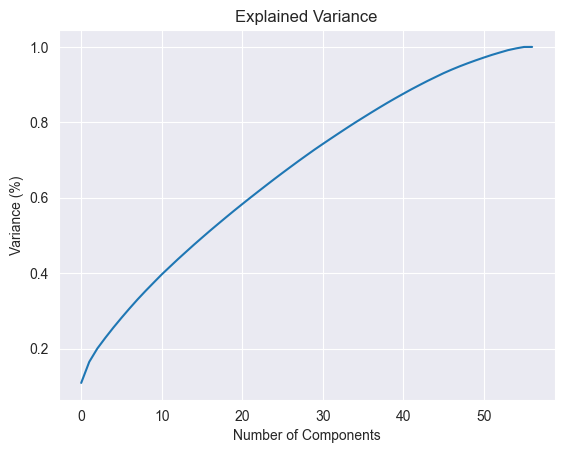

In [27]:
#Performing PCA to dataset

from sklearn.decomposition import PCA
pca = PCA()

principalComponents = pca.fit_transform(standardized_df)

plt.figure()

#Calculate the cumulative sum of the explained variance ratio of each principal component
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component

plt.title('Explained Variance')
plt.grid(True)
plt.show()

In [37]:
#Introducing PCA components
#taking optimal number of components as 44

pca = PCA(n_components=44)
new_data = pca.fit_transform(standardized_df)

# This will be the new data fed to the algorithm.
pca_df = pd.DataFrame(data = new_data,
                            columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21', 'PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30','PC31','PC32','PC33','PC34','PC35','PC36','PC37','PC38','PC39','PC40','PC41','PC42','PC43','PC44'])
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44
0,-0.766904,0.049608,-0.643945,0.037471,-0.254038,-0.329359,-0.084848,0.350190,1.751168,0.181552,...,0.355971,-0.300056,0.277801,0.129988,0.254300,0.061960,0.215245,0.212634,-0.404112,0.232951
1,-1.293574,2.007023,0.071448,-0.481374,-0.099497,-1.117637,-0.545042,0.250762,-0.309602,-0.630312,...,-0.253626,-0.114660,-0.485014,-0.186052,0.129972,0.080171,0.248457,0.540907,0.020566,0.317911
2,-1.612745,4.821309,3.137277,-1.073537,1.591558,-1.499962,-3.174001,-1.398540,1.031914,2.521059,...,2.072373,-0.009684,-0.731772,-0.286383,-0.306698,0.948106,0.856585,0.543930,0.316017,-0.750068
3,-0.857216,0.414170,-0.551310,-0.031406,-0.049925,0.703189,0.339622,-0.445365,-0.366294,0.183501,...,0.337603,-0.073956,0.055387,0.260857,-0.308179,0.479424,0.798939,-0.631782,0.343370,-0.306173
4,-0.858070,0.413503,-0.553434,-0.031666,-0.049952,0.703805,0.337875,-0.446647,-0.366633,0.183096,...,0.336915,-0.073960,0.057118,0.261358,-0.308196,0.479810,0.798131,-0.630376,0.343175,-0.305218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4205,-0.442735,-0.886794,-0.100335,0.567816,0.225226,-0.788700,0.143162,-0.209993,-0.078247,-0.129393,...,-0.116713,0.190494,0.136222,-0.482386,-0.079837,0.188138,-0.588305,-0.350270,0.221403,-0.146200
4206,-0.806714,-0.660529,-1.122744,-0.493822,-1.024713,-0.528131,0.880454,0.773180,-0.553142,0.642484,...,-0.048232,-0.778326,0.493389,0.430929,0.887049,-1.211615,0.656428,0.509603,0.405629,-0.220319
4207,-0.275975,-0.567903,0.359557,0.163244,-0.020695,-0.955188,0.270445,0.333314,0.244537,0.223371,...,0.704874,-0.011618,-0.010765,-0.612789,0.452444,-0.629318,-0.384429,-0.989711,0.397396,-0.222680
4208,-0.585767,-0.749534,-0.464737,0.290434,-0.277395,-0.760172,0.432750,0.114438,-0.369762,-0.614765,...,0.516532,-0.693855,-0.153363,0.303439,-0.020969,-0.367739,0.696671,-0.393962,0.193068,0.204525


##### 4210 rows * 44 columns

In [34]:
#Dataset after performing PCA

pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44
0,-0.766904,0.049611,-0.644009,0.037366,-0.254244,-0.329348,-0.085225,0.350234,1.751036,0.181890,...,0.357098,-0.300237,0.272749,0.124539,0.258394,0.070935,0.216801,0.217340,-0.397741,0.233896
1,-1.293574,2.007003,0.071592,-0.481110,-0.099267,-1.117533,-0.544404,0.250671,-0.309339,-0.631569,...,-0.246775,-0.118088,-0.478796,-0.194784,0.111358,0.072156,0.246657,0.534550,0.006190,0.311851
2,-1.612744,4.821295,3.137289,-1.073418,1.591729,-1.499785,-3.174416,-1.398758,1.032068,2.520279,...,2.070637,-0.015422,-0.728677,-0.283521,-0.321914,0.948882,0.855146,0.548070,0.341588,-0.733442
3,-0.857216,0.414169,-0.551305,-0.031396,-0.049908,0.703193,0.339609,-0.445375,-0.366284,0.183500,...,0.339548,-0.074155,0.056271,0.264360,-0.306163,0.479781,0.798950,-0.634290,0.343861,-0.301685
4,-0.858070,0.413501,-0.553431,-0.031658,-0.049938,0.703807,0.337854,-0.446657,-0.366625,0.183109,...,0.338819,-0.074146,0.057927,0.264920,-0.306046,0.480256,0.798159,-0.632804,0.343829,-0.300552


In [35]:
print(pca.explained_variance_)

[6.21425733 3.18296901 2.0133729  1.62941189 1.54594147 1.46864613
 1.41592923 1.36728273 1.29484816 1.2450804  1.23604894 1.14931689
 1.14404523 1.10351205 1.09710918 1.06431372 1.05385793 1.02433206
 1.01639087 1.00123624 0.97907001 0.96808613 0.95326519 0.94497479
 0.9380775  0.91812532 0.90393549 0.89564801 0.87379722 0.86521958
 0.83051232 0.81857798 0.81021876 0.802134   0.78859176 0.7602018
 0.75804149 0.74202835 0.72596325 0.70260945 0.68156463 0.67099756
 0.63838983 0.62568843]


In [36]:
print(pca.components_)

[[-0.04690805 -0.02058001 -0.05221265 ... -0.02020215 -0.03395575
  -0.04960884]
 [ 0.14443613  0.1118884   0.14576667 ...  0.13598963  0.2390276
   0.20847071]
 [-0.03012512 -0.02134669 -0.0304743  ...  0.30348918  0.46498085
   0.39000467]
 ...
 [-0.15347338  0.21017208 -0.00298768 ... -0.09646609  0.05888513
   0.47192381]
 [ 0.11350383  0.14387703  0.06608219 ... -0.10041061  0.04559577
   0.07534293]
 [ 0.12878765 -0.2578147   0.00967225 ... -0.16969427 -0.00444189
   0.37770943]]


In [70]:
# Defining Independent variable and Dependant variable

X = pca_df.iloc[:,0:44].values
y = df.iloc[:, 57].values

In [123]:
# Splitting the dataset into the Training set and Testing set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.24, random_state = 42)

# Building KNN model

In [124]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Perform grid search to find optimal value of k
param_grid = {'n_neighbors': [1, 3, 5, 7, 9]}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print optimal value of k
print('Optimal value of k:', grid_search.best_params_['n_neighbors'])

Optimal value of k: 5


In [125]:
# Build KNN model with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Evaluate the model on testing set
Y_pred = knn.predict(X_test)

# Print evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy:', accuracy_score(y_test, Y_pred))
print('Precision:', precision_score(y_test, Y_pred))
print('Recall:', recall_score(y_test, Y_pred))
print('F1 Score:', f1_score(y_test, Y_pred))

Accuracy: 0.8911968348170128
Precision: 0.8975
Recall: 0.8387850467289719
F1 Score: 0.8671497584541062


In [126]:
# Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [127]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [128]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[542,  41],
       [ 69, 359]], dtype=int64)

Text(113.9222222222222, 0.5, 'Predicted label')

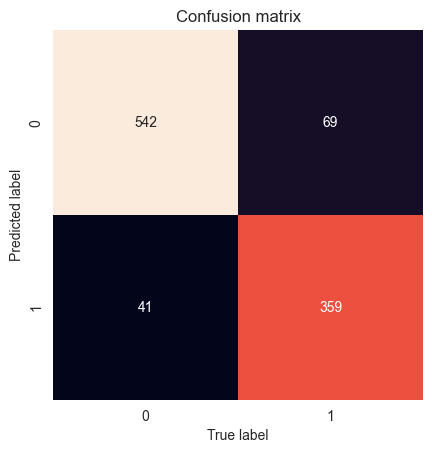

In [129]:
# based on test values generate the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Summary of the predictions made by the classifier
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)

plt.title('Confusion matrix')
plt.xlabel('True label')
plt.ylabel('Predicted label')

In [130]:
# Generate summary of the prediction (Classification Report) made by the classifier
from sklearn.metrics import classification_report

print('Classification Report : \n')
print(classification_report(y_test, y_pred)) #support - no. of samples in the test set

Classification Report : 

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       583
           1       0.90      0.84      0.87       428

    accuracy                           0.89      1011
   macro avg       0.89      0.88      0.89      1011
weighted avg       0.89      0.89      0.89      1011



In [132]:
# Accuracy score of the prediction
from sklearn.metrics import accuracy_score
print("Accuracy score of email prediction using KNN : ",accuracy_score(y_pred,y_test)*100)

Accuracy score of email prediction using KNN :  89.11968348170129


# Building the Decision Tree Model

In [139]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [141]:
# Fitting classifier to the Training set

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42,criterion='gini')
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [143]:
#Accuracy of testing data

from sklearn.metrics import accuracy_score

predictions_test=clf.predict(X_test)
accuracy_score(y_test, predictions_test)

0.8824228028503563

In [144]:
#Accuracy of training data

predictions_train = clf.predict(X_train)
accuracy_score(y_train,predictions_train)

0.9994061757719715

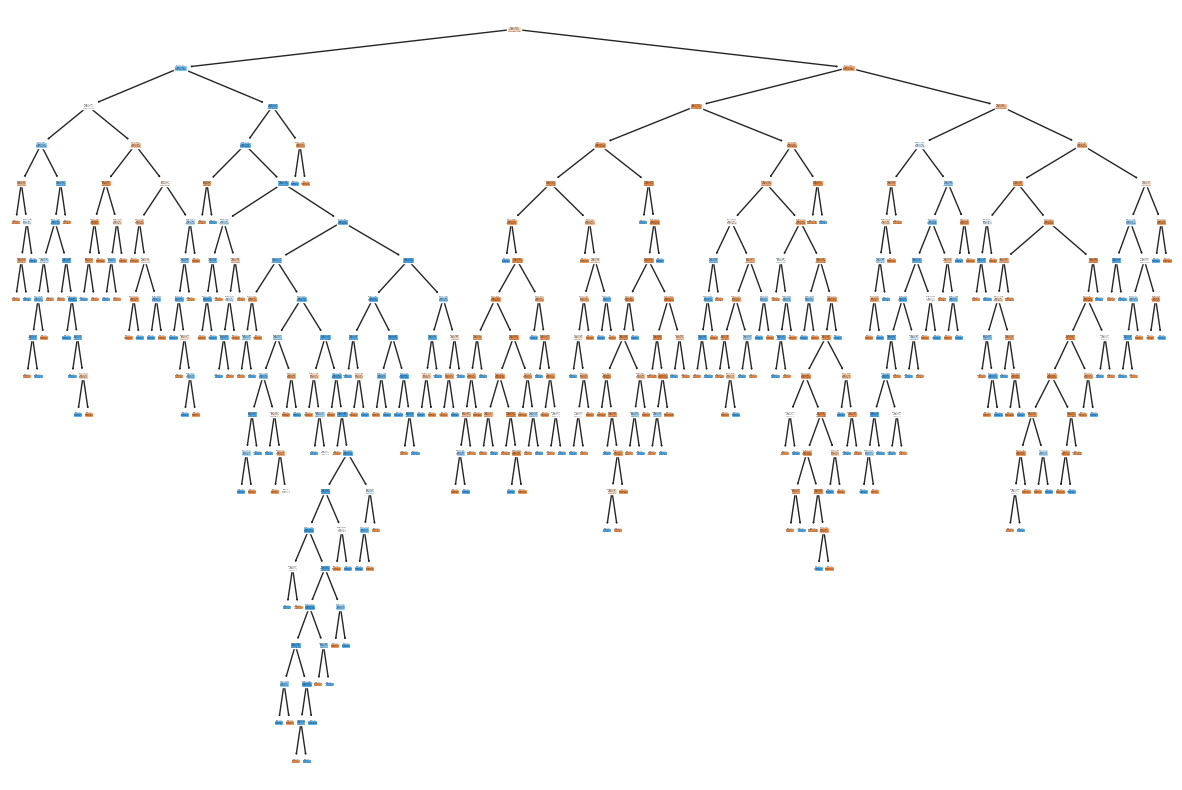

In [145]:
#Visualizing the final decision tree

from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)
plt.show()